In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import funcs_mcmc
%pylab inline
import pylab

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
#            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            anim.save(f.name, fps=20)
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [3]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

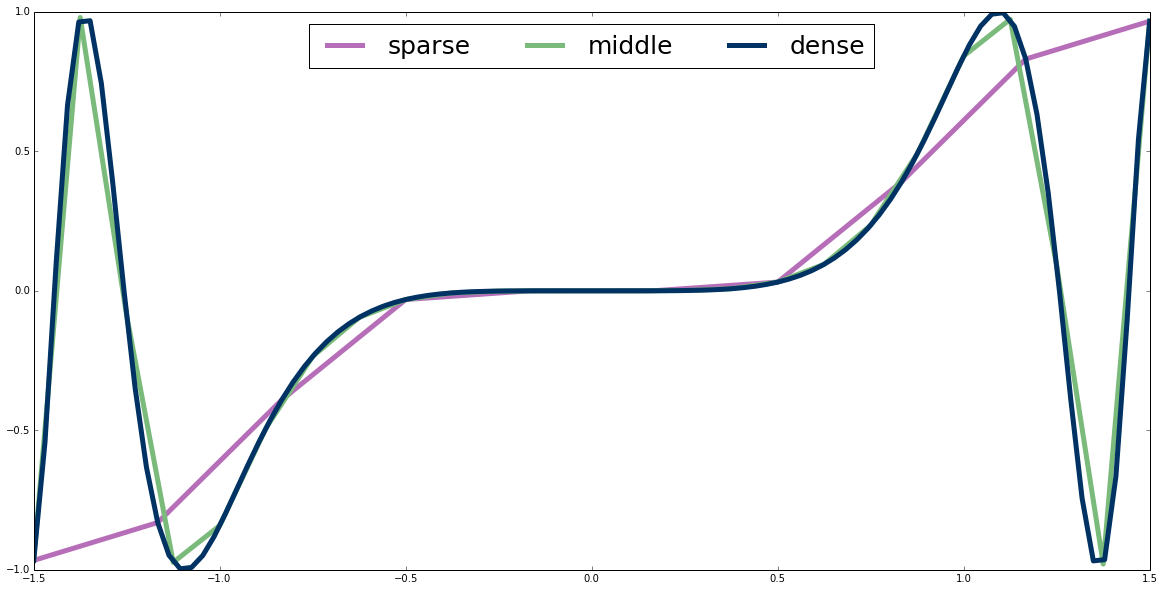

In [4]:
xsp = np.linspace(-1.5, 1.5, 10)
xmd = np.linspace(-1.5, 1.5, 25)
xdn = np.linspace(-1.5, 1.5, 100)

ysp, ymd, ydn = np.sin(xsp**5), np.sin(xmd**5), np.sin(xdn**5)

plt.figure(figsize=(20,10))
plt.plot(xsp, ysp, lw=5, color='#B76EB8', label='sparse')
plt.plot(xmd, ymd, lw=5, color='#7ABA7A', label='middle')
plt.plot(xdn, ydn, lw=5, color='#003264', label='dense')
plt.legend(fontsize=25, loc='upper center', ncol=3)
plt.show()

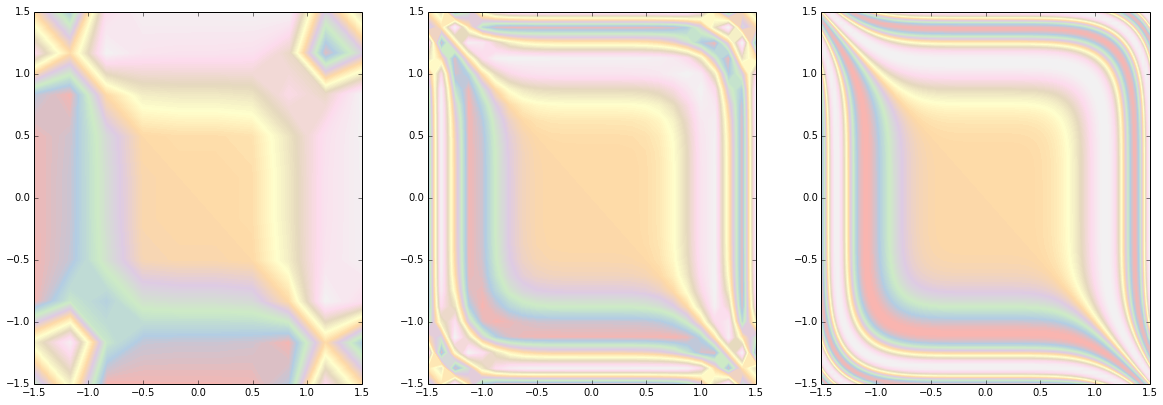

In [5]:
xsp, ysp = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
xmd, ymd = np.meshgrid(np.linspace(-1.5, 1.5, 25), np.linspace(-1.5, 1.5, 25))
xdn, ydn = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))

Zsp = np.sin(xsp**5 + ysp**5)
Zmd = np.sin(xmd**5 + ymd**5)
Zdn = np.sin(xdn**5 + ydn**5)


fig = plt.figure(figsize=(20,20.0/3.0))


fig.add_subplot(1,3,1)
plt.contourf(xsp, ysp, Zsp, 100, cmap=plt.cm.Pastel1)

fig.add_subplot(1,3,2)
plt.contourf(xmd, ymd, Zmd, 100, cmap=plt.cm.Pastel1)

fig.add_subplot(1,3,3)
plt.contourf(xdn, ydn, Zdn, 100, cmap=plt.cm.Pastel1)
plt.show()



In [6]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

##### Build a Gaussian Proposal Distribution that takes the current point and the proposal variance as arguments and produces a proposal point.

In [7]:
# Build a simple function that returns a draw from a 1D gaussian distribution 
# centered around the current point
def propose(current_point, sigma):
    # Your code here
    return proposal_point


#### Test your function by building a loop that draws 10,000 samples from your proposal distribution with $\mu = 5.0$ and $\sigma = 0.01$. Make a histogram of your results. Your plot should (almost certainly) resemble a gaussian with the aformentioned parameters. Draw a vertical line at the point where the real mean of the distribution was. Draw two more vertical lines at the $1-\sigma$ points on the distribution. The result should look like the example when everything is correct.

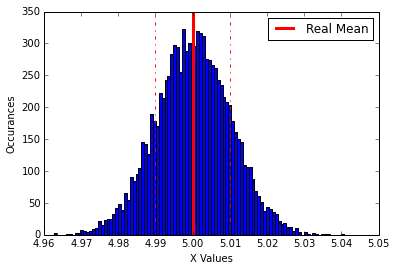

In [8]:
# Example
funcs_mcmc.propose()

##### Build the main MCMC loop to sample easily from a gaussian function with $\mu = 0$ and $\sigma = 1$. The Metropolis algorithm for MCMC is as follows:

Algorithm 1 MCMC

1: i = 0

2: Choose random starting point for $x[0]$, compute $p(x[0])$

3: while i from 0 to N - 1, do

   4: Draw random guess $x_0$

   5: Calculate Hasting’s ratio $H = \frac{p(x_0)}{p(x_i)}$

   6: Draw $\alpha$ from $U[0, 1]$

   7: if $H \geq \alpha$ then

   8: $x_{i+1} = x_0$

   9: else
  
   10: $x_{i+1} = x_i$

   11: end if

   12: i = i + 1

13: end for



Note that there is nothing inherently Bayesian about the basic Metropolis algorithm. In the above algorithm the probability $p(x)$ is just the probability of the point $x$ on the distribution we are attempting to simulate. Take some time to think about how the acceptance condition modulates the probability of moving to the proposed point such that it is proportional to the ratio of the probabilities of the proposed and current points.

 Your function should take $N$ ( the number of iterations ), $\mu$ and $\sigma$ (the FIXED parameters for this simulation), "step" (the variance of the proposal distribution - this should be passed to your other function) and $x_0$ (an initial point to seed the chain) as arguments.

 Use your MCMC function to draw 10,000 samples from a Gaussian with $\mu = 0$ and $\sigma = 1$. Make histograms of your results. Propose jumps with your proposal function. Experiment with the variance of the proposal distribution over several orders of magnitude between $10^{-3}$ and $1$. Which value works the best? Why might this be?

You might ask how this improves matters in any way - after all, aren't we using a distribution to directly simulate itself? The answer is yes, but notice how MCMC smartly picks the areas of highest probability to sample from - in doing this it minimizes actual calls to the function. This simple 1D PDF is easy to simulate regardless, but were it a complicated, high dimensional distribution, this might be the only way to avoid evaluating the function an absurd amount of times.

In [9]:
def MCMC(N, mu, sigma, initPoint):
    # Your code here
    return samples

In [10]:
#Example
Exsamples = funcs_mcmc.MCMC_sample(10000, 0.0, 1.0, 0.0, 1)

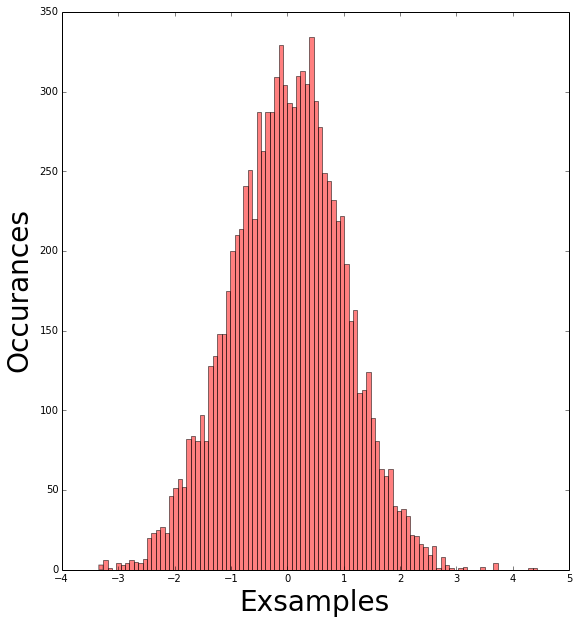

In [11]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
n,bins,patches = plt.hist(Exsamples, bins=100)
pylab.setp(patches, 'facecolor', 'r', 'alpha', 0.5)
plt.xlabel('Exsamples', fontsize='28')
plt.ylabel('Occurances', fontsize='28')


# Uncomment the below when you want to test your function

#Yoursamples = MCMC(your, args, go, here)
#fig.add_subplot(1,2,2)
#plt.hist(Yoursamples, bins=100)
#plt.xlabel('Yoursamples')
#plt.ylabel('Occurances')


##### You will now write an MCMC to simulate the Bayesian posterior probability on the parameters that created the above data. You will use the output of the previous exercise as the "data" that the second MCMC will use to estimate parameters ($\mu$ and $\sigma$).

In [12]:
#Uncomment the lines below when you are ready to continue.
#yourdata = Yoursamples
exdata = Exsamples

It may not seem like it at first, but this portion of the project is a just a slightly more applied version of the previous part. You have some data in hand - the samples from above (this data need not be generated from an MCMC, any sampling from a distribution will do) and you wish to know the parameters that formed the data. Instead of looking for the probability distribution of a random variable GIVEN THE PARAMETERS, you are now looking for a probability distribution of the parameters GIVEN THE RANDOM DATA. 

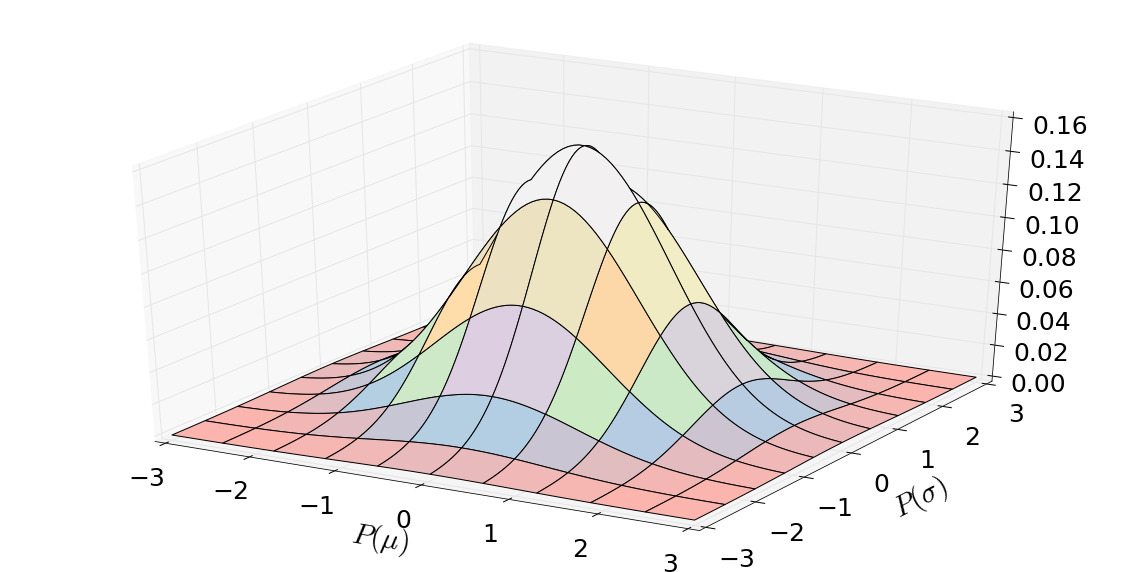

In [13]:
x = np.linspace(-3,3, 100)
y = np.linspace(-3,3, 100)
x_axis = sp.stats.norm.pdf(x)
y_axis = sp.stats.norm.pdf(y)

x, y = np.meshgrid(x, y)
z = (1/(2*np.pi*1*1) * np.exp(-(x**2/(2*1**2)
     + y**2/(2*1**2))))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='Pastel1')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(25)

ax.set_xlabel(r'$P(\mu)$', fontsize='29')
ax.set_ylabel(r'$P(\sigma)$', fontsize='29')
    
plt.show()

You're hopping around a probability distribution over parameter space this time. That means you have an axis for every parameter that you are trying to infer. You need to extend the scheme you implemented above to two dimensions. Once again, there are several pieces that need to come together.

##### The simplest and most intuitive component to to write is the proposal distribution. In the previous problem, you picked a proposal point by drawing from a small gaussian centered around the current point. To sample in two dimensions we need to draw a proposal point from a two dimensional Gaussian!


Before doing this, let's take a step back and recall the properties of multivariate Gaussian distributions:

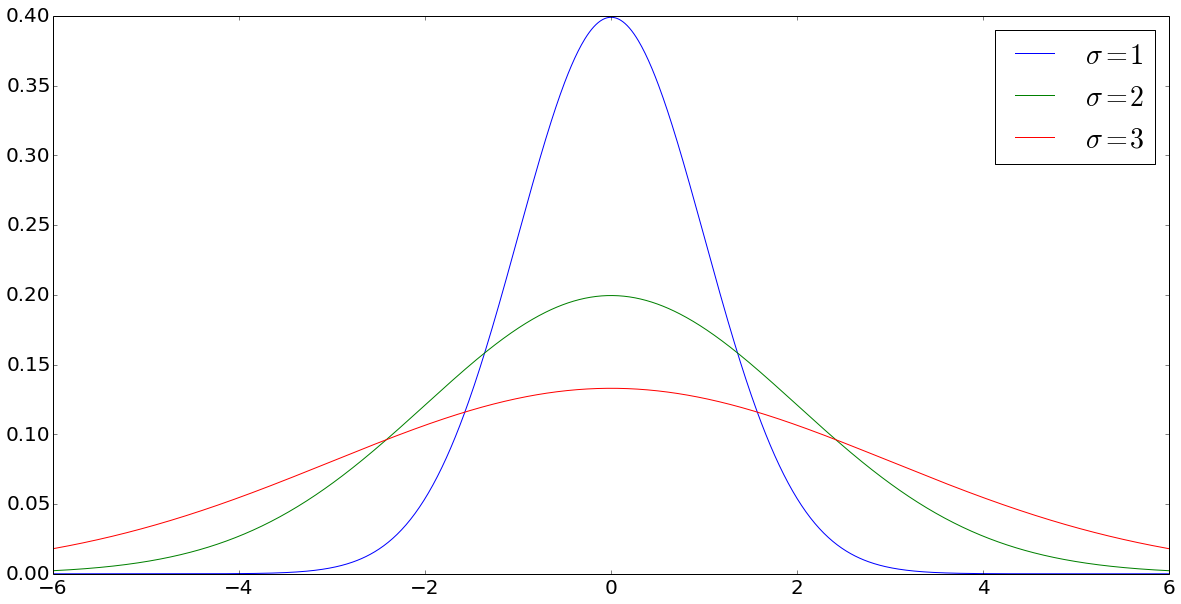

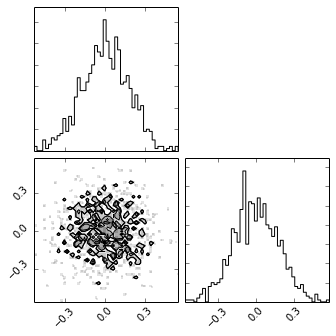

In [14]:
funcs_mcmc.mvrt_gauss()

As you can see, there's more to a multivariate distribution then just a single number specifying the variance. In two dimensions, there's independent "variances" for both the $x$ and $y$ directions, $\sigma_x$ and $\sigma_y$. These specify the spread in their respective directions - notice that as long as the axes themselves are orthogonal these numbers are completely independent of each other. A distribution may be very narrow in one direction and very wide in another.

Moreover, there's two $\textit{covariances}$, $\sigma_{xy}$ and $\sigma_{yx}$. These numbers represent the degree to which the $x$ values of the distribution correlate with the $y$ values. If the covariances were zero, 